



# Loading Packages

In [5]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier,VotingClassifier 
from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline



# Loading Dataset

In [6]:
data=pd.read_csv(r"C:\Users\s544906\Fall2022\GDP-2\heart.csv")

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
X = data.drop('target',1)
Y = data['target']

In [9]:
categorical_feature_mask = X.dtypes==object

In [10]:
categorical_cols = X.columns[categorical_feature_mask].tolist()
categorical_cols


[]

# splitting data

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)

In [12]:
x_train.shape

(686, 13)

In [13]:
x_test.shape

(339, 13)

In [14]:
y_train.shape

(686,)

In [15]:
y_test.shape

(339,)

# Applying PCA

In [16]:
sc = StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)
X_train

array([[ 0.73133104,  0.64829766, -0.91630468, ..., -0.65696462,
         0.22608859, -0.51163058],
       [ 0.063594  , -1.54250133,  0.0552332 , ...,  0.97003079,
        -0.7372454 , -0.51163058],
       [ 0.28617302,  0.64829766,  1.02677108, ..., -0.65696462,
         0.22608859,  1.09101132],
       ...,
       [ 1.17648907,  0.64829766,  1.99830896, ..., -0.65696462,
         0.22608859, -0.51163058],
       [ 1.39906808,  0.64829766, -0.91630468, ..., -0.65696462,
        -0.7372454 , -0.51163058],
       [ 0.62004154,  0.64829766,  1.02677108, ..., -0.65696462,
        -0.7372454 , -0.51163058]])

In [17]:
pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [18]:

pca = PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
X_train


array([[ 2.64883175, -1.20981157],
       [-1.2171714 ,  1.54217049],
       [-0.13338693,  0.05707181],
       ...,
       [-0.00761104,  2.40559363],
       [ 1.56577606, -0.90310399],
       [ 0.33443391,  0.25488145]])

In [19]:
accuracy1=[]
def generate_accuracy(ytest,ypred,classifier):
    cm = confusion_matrix(ytest,ypred)
    accuracy1.append(accuracy_score(ytest, ypred))
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)# create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    print('Accuracy',accuracy_score(ytest, ypred))
    print('f1_score',f1_score(ytest,ypred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(ytest,ypred))
    #print('Mean Squared Error:', metrics.mean_squared_error(ytest,ypred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest,ypred)))
    
    print("\n",classification_report(ytest,ypred))

    
    

    

In [20]:
accuracy2=[]
def generate_bag_accuracy(ytest,ypred,classifier):
    cm = confusion_matrix(ytest,ypred)
    accuracy2.append(accuracy_score(ytest, ypred))
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)# create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    print('Accuracy',accuracy_score(ytest, ypred))
    print('f1_score',f1_score(ytest,ypred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(ytest,ypred))
    #print('Mean Squared Error:', metrics.mean_squared_error(ytest,ypred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest,ypred)))
    
    print("\n",classification_report(ytest,ypred))

# Logistic Regression

Accuracy 0.831858407079646
f1_score 0.841225626740947
Mean Absolute Error: 0.168141592920354
Root Mean Squared Error: 0.41005071993639275

               precision    recall  f1-score   support

           0       0.81      0.83      0.82       158
           1       0.85      0.83      0.84       181

    accuracy                           0.83       339
   macro avg       0.83      0.83      0.83       339
weighted avg       0.83      0.83      0.83       339



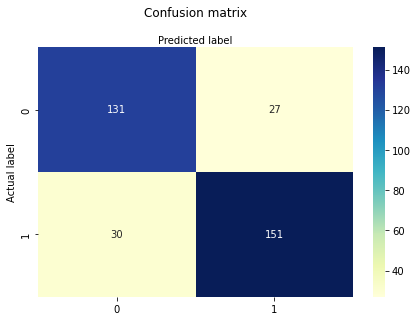

In [21]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
generate_accuracy(y_test,y_pred,logreg)

# Bagged Logistic Regression

Accuracy 0.8377581120943953
f1_score 0.8467966573816156
Mean Absolute Error: 0.16224188790560473
Root Mean Squared Error: 0.40279261153303786

               precision    recall  f1-score   support

           0       0.82      0.84      0.83       158
           1       0.85      0.84      0.85       181

    accuracy                           0.84       339
   macro avg       0.84      0.84      0.84       339
weighted avg       0.84      0.84      0.84       339



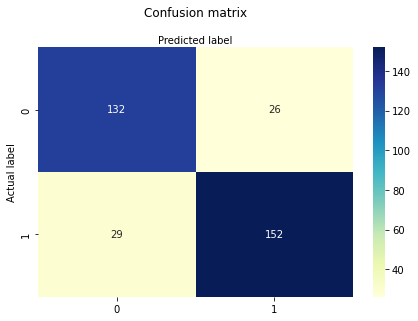

In [22]:
bagged_logreg= BaggingClassifier(logreg,bootstrap=True)
bag_model=bagged_logreg.fit(X_train,y_train)
y_pred=bagged_logreg.predict(X_test)
generate_bag_accuracy(y_test,y_pred,bagged_logreg)


# KNN

Accuracy 0.9233038348082596
f1_score 0.9226190476190476
Mean Absolute Error: 0.07669616519174041
Root Mean Squared Error: 0.27694072505094014

               precision    recall  f1-score   support

           0       0.86      1.00      0.92       158
           1       1.00      0.86      0.92       181

    accuracy                           0.92       339
   macro avg       0.93      0.93      0.92       339
weighted avg       0.93      0.92      0.92       339



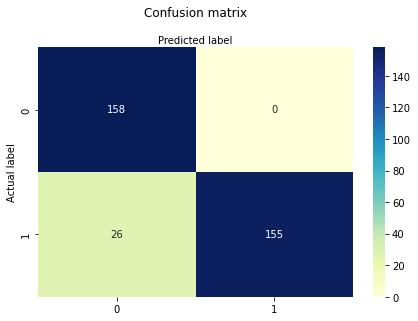

In [60]:
neigh=KNeighborsClassifier(n_neighbors=2)
knn=neigh.fit(X_train, y_train) 
y_pred=neigh.predict(X_test)
generate_accuracy(y_test,y_pred,neigh)

 

# Bagged KNN

Accuracy 0.9528023598820059
f1_score 0.9542857142857143
Mean Absolute Error: 0.0471976401179941
Root Mean Squared Error: 0.21725017863742735

               precision    recall  f1-score   support

           0       0.92      0.99      0.95       158
           1       0.99      0.92      0.95       181

    accuracy                           0.95       339
   macro avg       0.95      0.95      0.95       339
weighted avg       0.96      0.95      0.95       339



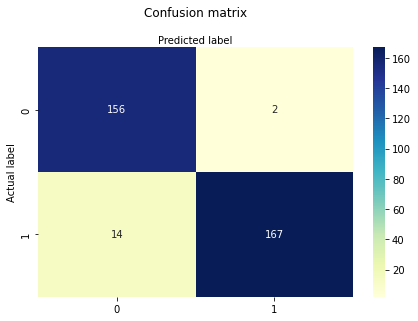

In [61]:
bagged_knn= BaggingClassifier(neigh)
bag_model=bagged_knn.fit(X_train,y_train)
y_pred=bagged_knn.predict(X_test)
generate_bag_accuracy(y_test,y_pred,bagged_knn)


# Neural Networks

Accuracy 0.9085545722713865
f1_score 0.9164420485175202
Mean Absolute Error: 0.09144542772861357
Root Mean Squared Error: 0.30239945060898105

               precision    recall  f1-score   support

           0       0.93      0.87      0.90       158
           1       0.89      0.94      0.92       181

    accuracy                           0.91       339
   macro avg       0.91      0.91      0.91       339
weighted avg       0.91      0.91      0.91       339



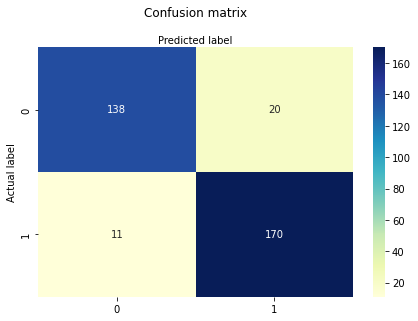

In [62]:
neural= MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,random_state=0)
nn=neural.fit(X_train,y_train)
y_pred=neural.predict(X_test)
generate_accuracy(y_test,y_pred,neural)


# Bagged Neural Netwoks

Accuracy 0.8908554572271387
f1_score 0.8986301369863015
Mean Absolute Error: 0.10914454277286136
Root Mean Squared Error: 0.3303703115790845

               precision    recall  f1-score   support

           0       0.89      0.87      0.88       158
           1       0.89      0.91      0.90       181

    accuracy                           0.89       339
   macro avg       0.89      0.89      0.89       339
weighted avg       0.89      0.89      0.89       339



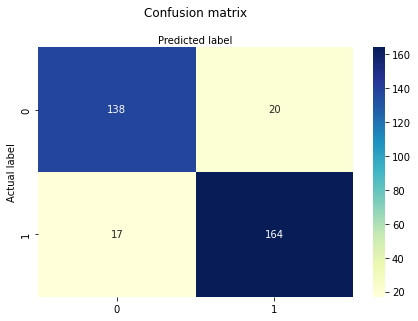

In [63]:
bagged_neural=BaggingClassifier(neural)
bag_model=bagged_neural.fit(X_train,y_train)
y_pred=bagged_neural.predict(X_test)
generate_bag_accuracy(y_test,y_pred,bagged_neural)


# Naive Bayes

Accuracy 0.8289085545722714
f1_score 0.8423913043478262
Mean Absolute Error: 0.1710914454277286
Root Mean Squared Error: 0.41363201692776225

               precision    recall  f1-score   support

           0       0.83      0.80      0.81       158
           1       0.83      0.86      0.84       181

    accuracy                           0.83       339
   macro avg       0.83      0.83      0.83       339
weighted avg       0.83      0.83      0.83       339



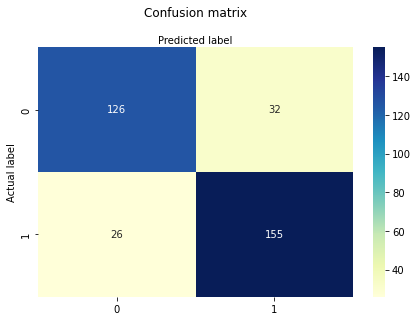

In [64]:
classifier=GaussianNB()
nb=classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
generate_accuracy(y_test,y_pred,classifier)

# Bagged Naive Bayes

Accuracy 0.8259587020648967
f1_score 0.8426666666666666
Mean Absolute Error: 0.17404129793510326
Root Mean Squared Error: 0.4171825714661427

               precision    recall  f1-score   support

           0       0.84      0.77      0.81       158
           1       0.81      0.87      0.84       181

    accuracy                           0.83       339
   macro avg       0.83      0.82      0.82       339
weighted avg       0.83      0.83      0.83       339



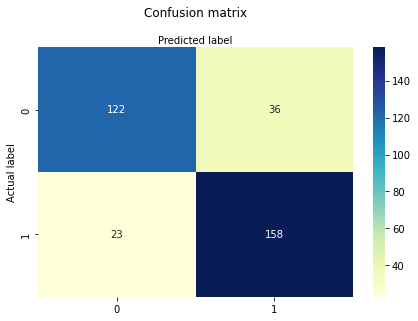

In [65]:
bagged_nb= BaggingClassifier(classifier)
bag_model=bagged_nb.fit(X_train,y_train)
y_pred=bagged_nb.predict(X_test)
generate_bag_accuracy(y_test,y_pred,bagged_nb)

# SVM

Accuracy 0.8259587020648967
f1_score 0.837465564738292
Mean Absolute Error: 0.17404129793510326
Root Mean Squared Error: 0.4171825714661427

               precision    recall  f1-score   support

           0       0.82      0.81      0.81       158
           1       0.84      0.84      0.84       181

    accuracy                           0.83       339
   macro avg       0.83      0.82      0.83       339
weighted avg       0.83      0.83      0.83       339



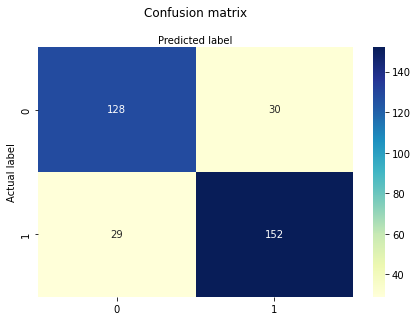

In [66]:
svclassifier=SVC(kernel='linear')
svm=svclassifier.fit(X_train,y_train)
y_pred=svclassifier.predict(X_test)
generate_accuracy(y_test,y_pred,svclassifier)

# Bagged SVM

Accuracy 0.8407079646017699
f1_score 0.8483146067415731
Mean Absolute Error: 0.1592920353982301
Root Mean Squared Error: 0.3991140631426436

               precision    recall  f1-score   support

           0       0.82      0.85      0.83       158
           1       0.86      0.83      0.85       181

    accuracy                           0.84       339
   macro avg       0.84      0.84      0.84       339
weighted avg       0.84      0.84      0.84       339



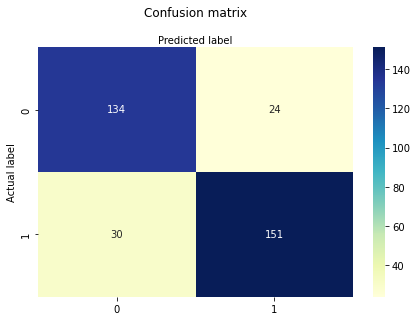

In [67]:
bagged_svm=BaggingClassifier(svclassifier)
bag_model=bagged_svm.fit(X_train,y_train)
y_pred=bagged_svm.predict(X_test)
generate_bag_accuracy(y_test,y_pred,bagged_svm)

# Decision Tree

Accuracy 0.9705014749262537
f1_score 0.9717514124293786
Mean Absolute Error: 0.029498525073746312
Root Mean Squared Error: 0.17175134664318156

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       158
           1       0.99      0.95      0.97       181

    accuracy                           0.97       339
   macro avg       0.97      0.97      0.97       339
weighted avg       0.97      0.97      0.97       339



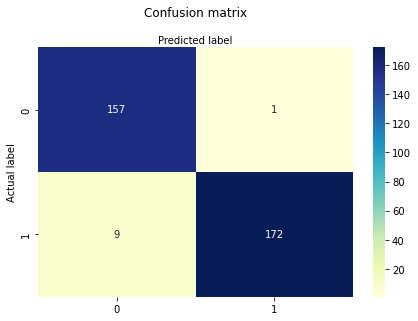

In [68]:
tree = DecisionTreeClassifier(random_state=0)
dt=tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
generate_accuracy(y_test,y_pred,tree)



# Bagged Decision Tree

Accuracy 0.976401179941003
f1_score 0.9776536312849162
Mean Absolute Error: 0.02359882005899705
Root Mean Squared Error: 0.1536190745285137

               precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.99      0.97      0.98       181

    accuracy                           0.98       339
   macro avg       0.98      0.98      0.98       339
weighted avg       0.98      0.98      0.98       339



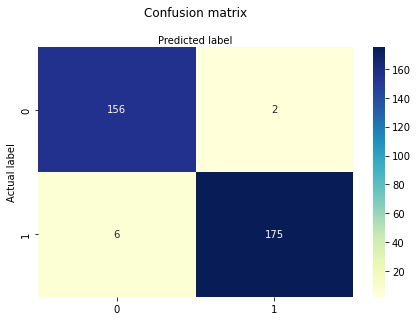

In [69]:
bagged_tree= BaggingClassifier(tree)
bag_model=bagged_tree.fit(X_train,y_train)
y_pred=bagged_tree.predict(X_test)
generate_bag_accuracy(y_test,y_pred,bagged_tree)


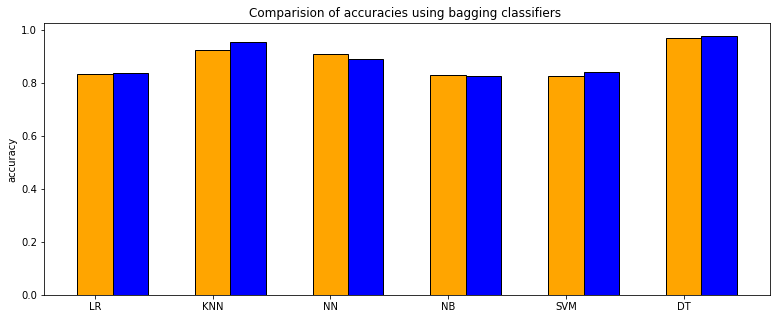

In [70]:
r1 = np.arange(len(accuracy1))
r2 = [x + 0.3 for x in r1]
plt.figure(figsize=(13,5))
plt.bar(r1, accuracy1, width = 0.3, color = 'orange', edgecolor = 'black')
plt.bar(r2, accuracy2, width = 0.3, color = 'blue', edgecolor = 'black')
plt.xticks([r for r in range(len(accuracy1))],['LR','KNN','NN','NB','SVM','DT'])
plt.ylabel('accuracy')
plt.title('Comparision of accuracies using bagging classifiers ')
plt.show()

In [71]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [72]:
accuracy3=[]
def generate_ensemble_accuracy(ytest,ypred,classifier):
    cm = confusion_matrix(ytest,ypred)
    accuracy3.append(accuracy_score(ytest, ypred))
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)# create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    print('Accuracy',accuracy_score(ytest, ypred))
    print('f1_score',f1_score(ytest,ypred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(ytest,ypred))
    #print('Mean Squared Error:', metrics.mean_squared_error(ytest,ypred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest,ypred)))
    
    print("\n",classification_report(ytest,ypred))

# Random Forest

Accuracy 0.9823008849557522
f1_score 0.9831460674157304
Mean Absolute Error: 0.017699115044247787
Root Mean Squared Error: 0.13303802104754786

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       158
           1       1.00      0.97      0.98       181

    accuracy                           0.98       339
   macro avg       0.98      0.98      0.98       339
weighted avg       0.98      0.98      0.98       339



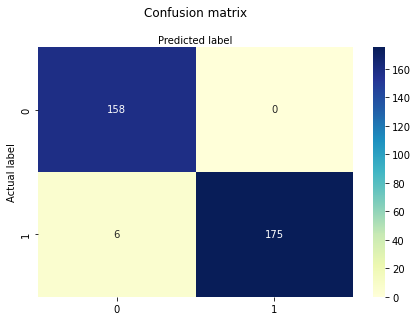

In [73]:
clf = RandomForestClassifier(n_estimators=500, max_features=2,random_state=0)
rf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
generate_ensemble_accuracy(y_test,y_pred,clf)

# Ada Boost

Accuracy 0.943952802359882
f1_score 0.9461756373937678
Mean Absolute Error: 0.05604719764011799
Root Mean Squared Error: 0.23674289353667619

               precision    recall  f1-score   support

           0       0.92      0.97      0.94       158
           1       0.97      0.92      0.95       181

    accuracy                           0.94       339
   macro avg       0.94      0.95      0.94       339
weighted avg       0.95      0.94      0.94       339



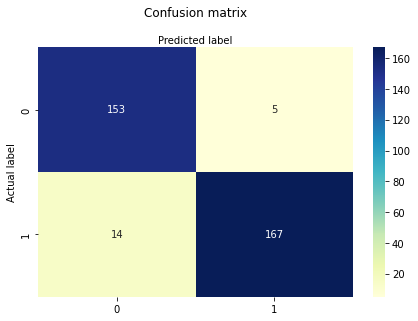

In [74]:
adabst= AdaBoostClassifier(n_estimators=500)
adb=adabst.fit(X_train,y_train)
y_pred=adabst.predict(X_test)
generate_ensemble_accuracy(y_test,y_pred,adabst)

# Gradiant Boost

Accuracy 0.9734513274336283
f1_score 0.9747899159663865
Mean Absolute Error: 0.02654867256637168
Root Mean Squared Error: 0.1629376339780705

               precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.99      0.96      0.97       181

    accuracy                           0.97       339
   macro avg       0.97      0.97      0.97       339
weighted avg       0.97      0.97      0.97       339



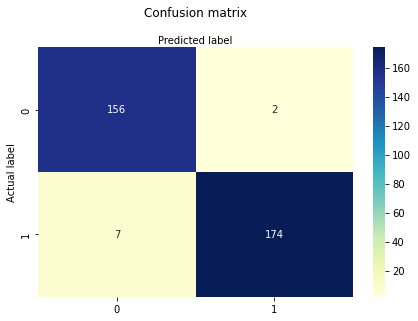

In [75]:
gradbst= GradientBoostingClassifier(n_estimators=500)
gb=gradbst.fit(X_train,y_train)
y_pred=gradbst.predict(X_test)
generate_ensemble_accuracy(y_test,y_pred,gradbst)

# Voting Classifier

In [76]:
estimator = [] 
estimator.append(('KNN',KNeighborsClassifier(n_neighbors=2)))
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 
estimator.append(('NB',GaussianNB()))
estimator.append(('NN',MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation='relu',solver='adam',random_state=0)))

Accuracy 0.8849557522123894
f1_score 0.8882521489971348
Mean Absolute Error: 0.11504424778761062
Root Mean Squared Error: 0.3391817326856071

               precision    recall  f1-score   support

           0       0.85      0.92      0.88       158
           1       0.92      0.86      0.89       181

    accuracy                           0.88       339
   macro avg       0.89      0.89      0.88       339
weighted avg       0.89      0.88      0.89       339



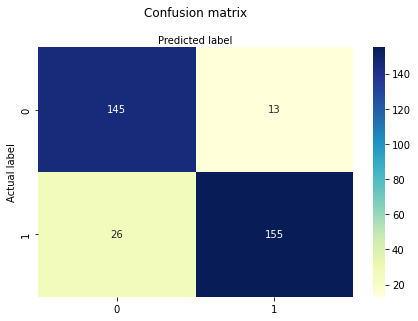

In [77]:
ensemble=VotingClassifier(estimator)
ensemble.fit(X_train, y_train)
y_pred=ensemble.predict(X_test)
generate_ensemble_accuracy(y_test,y_pred,ensemble)

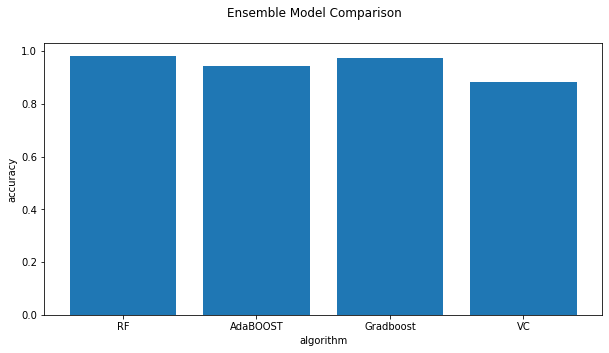

In [78]:
classifiers=['RF','AdaBOOST','Gradboost','VC']
fig=plt.figure(figsize=(10,5))
fig.suptitle('Ensemble Model Comparison')
plt.bar(classifiers,accuracy3)
plt.xlabel('algorithm')
plt.ylabel('accuracy')
plt.show()

In [79]:
accuracy1

[0.831858407079646,
 0.9233038348082596,
 0.9085545722713865,
 0.8289085545722714,
 0.8259587020648967,
 0.9705014749262537]

In [80]:
accuracy2

[0.8348082595870207,
 0.9528023598820059,
 0.8908554572271387,
 0.8259587020648967,
 0.8407079646017699,
 0.976401179941003]

In [81]:
accuracy3


[0.9823008849557522, 0.943952802359882, 0.9734513274336283, 0.8849557522123894]